# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [132]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [133]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [134]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [135]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [136]:
# Significado de cada columna

# 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2) MILK: annual spending (m.u.) on milk products (Continuous);
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
# 7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
# 8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

# Podemos ver que no tenemos datos nulos y no tenemos columnas con registros categoricos todos los datos son numericos.

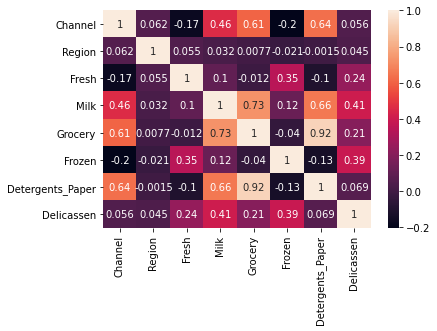

In [137]:
customers_corr = customers.corr()
sns.heatmap(customers_corr, annot=True);

In [138]:
# No tenemos alta colinearidad entre las columnas

In [139]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


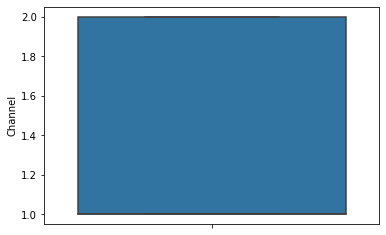

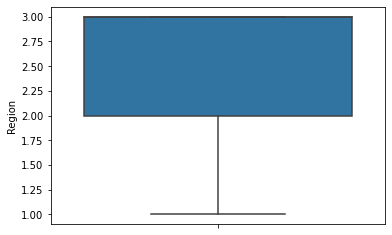

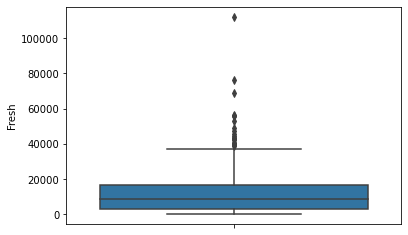

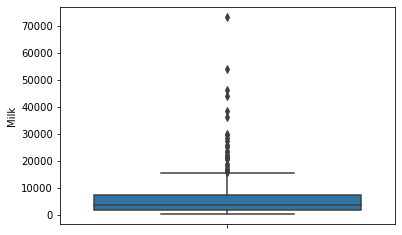

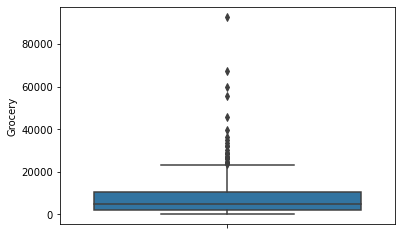

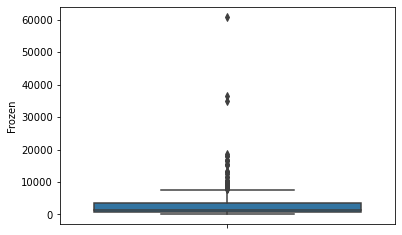

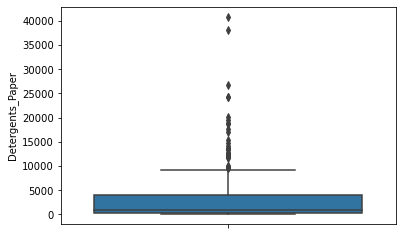

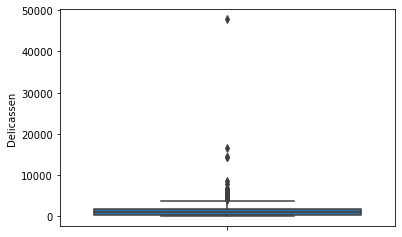

In [140]:
for col in customers.columns:
    sns.boxplot(y=customers[col])
    plt.show()

In [141]:
# Tenemos varios outliers en las columnas de: Fresh, Milk, Grocery, Frozen, Detergents_Paper y Delicassen

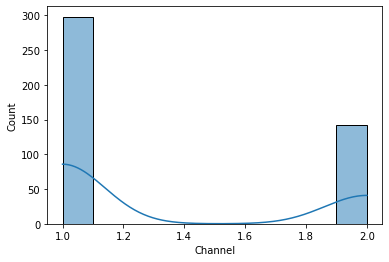

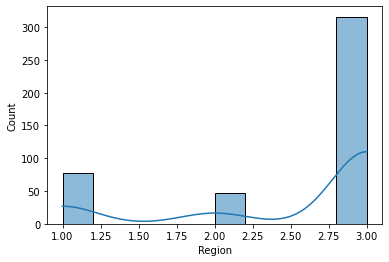

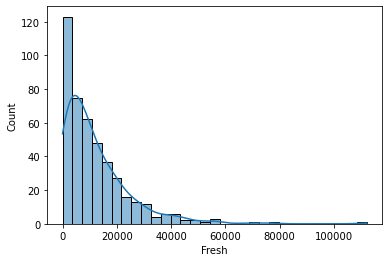

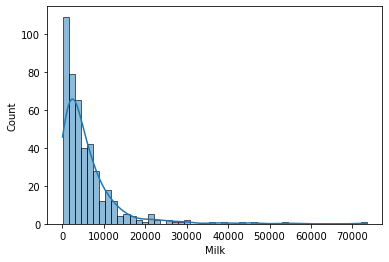

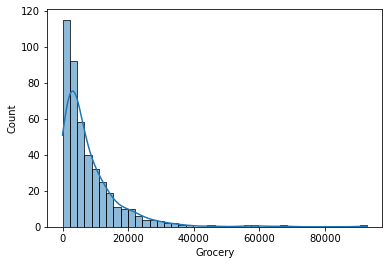

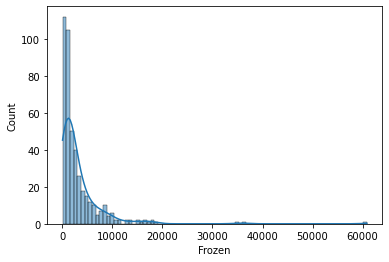

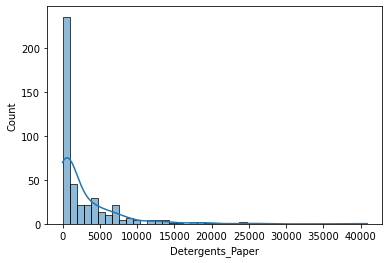

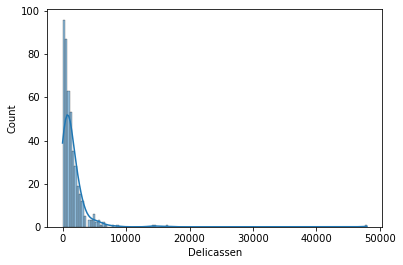

In [142]:
for col in customers.columns:
    sns.histplot(x=customers[col], kde=True)
    plt.show()

In [143]:
# Podemos ver que todas las distribuciones estan sesgadas, y no son normales. Son distribuciones exponenciales.
# Adicionalmente vemos que tenemos una gran cantidad de outliers, por lo que debemos tratarlos y lo haremos en el siguiente
# paso

# No tenemos datos nulos y tambien los tipos de datos estan correctos. No tenemos datos categoricos que debemos cambiar
# a numericos a travez de un one hot encoder

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [296]:
# Your code here
# Tenemos muchos outliers que van a afectar a nuestro modelo. Lo mejor es tratar de no tomarlos en cuenta. Para ello vamos
# a usar un Robust Scaler

from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
rb.fit(customers.iloc[:, 2:])
customers_rb = rb.transform(customers.iloc[:, 2:])

customers_scale = pd.concat([customers.iloc[:, :2], pd.DataFrame(customers_rb, columns=customers.columns[2:])], axis=1)
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,2,3,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,2,3,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,1,3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,2,3,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314


In [297]:
customers_scale['Channel'].unique()

array([2, 1], dtype=int64)

In [298]:
customers_scale['Region'].unique()

array([3, 1, 2], dtype=int64)

In [299]:
# Vemos que tenemos Channel 1 o 2 y Region 3, 1, 2. Nuestro modelo puede entender que las estamos ponderando, por lo que 
# lo mejor es pasarlo a Binario.

customers_scale = pd.get_dummies(customers_scale, columns=['Region', 'Channel'], drop_first=True)
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810,0,1,1
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008,0,1,1
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459,0,1,1
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507,0,1,0
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314,0,1,1


In [300]:
# Your comment here

# Como se vio previamente, tenemos muchos outliers, y esto podria causar problemas dependiendo del modelo no supervisado
# que usemos, por lo que lo mejor es tratarlos. Para ello se uso el RobustScaler el cual remueve la media y escala los 
# datos de acuerdo al rango de los cuartiles

# Por ultimo, se pasaron las columnas de Channel y Region a binario por lo ya mencionado.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [301]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
# Ya anteriormente se realizo un escalamiento, se uso un Robust Scale para tratar a los outliers. Pero esto tambien nos
# estandariza nuestros datos

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

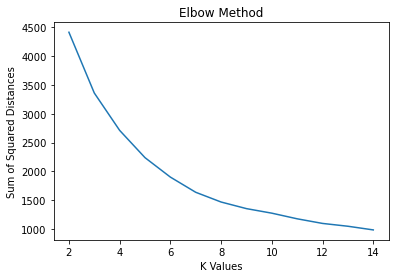

In [302]:
K = range(2, 15)
sum_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(customers_scale)
    sum_squared_distances.append(model.inertia_)

plt.plot(K, sum_squared_distances)
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

plt.show()

In [303]:
# A travez del metodo del codo vemos que podemos agruparlos en 5 grupos.

In [304]:
# Your code here:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(customers_scale)

customers_label = kmean.labels_

customers_labels = customers_scale.copy()
customers_labels['labels'] = customers_label
customers_labels.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2,labels
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810,0,1,1,4
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008,0,1,1,4
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459,0,1,1,4
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507,0,1,0,0
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314,0,1,1,0


Count the values in `labels`.

In [305]:
# Your code here:
customers_labels['labels'].value_counts()

0    288
4    110
3     30
1     11
2      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [306]:
# Your code here
from sklearn.cluster import AgglomerativeClustering

aglo_clust = AgglomerativeClustering(n_clusters=5)
aglo_clust.fit(customers_scale)

customers_labels['labels_AC'] = aglo_clust.labels_

Count the values in `labels_AC`.

In [307]:
# Your code here
customers_labels['labels_AC'].value_counts()

2    282
4    120
1     31
0      6
3      1
Name: labels_AC, dtype: int64

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively

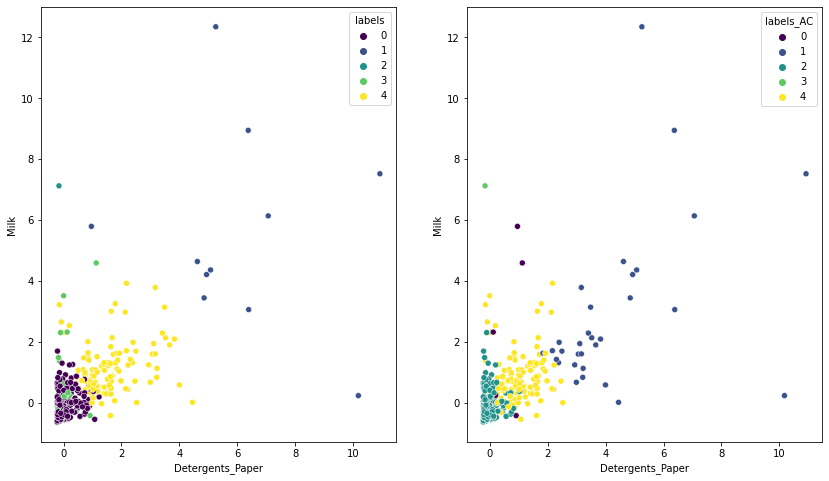

In [316]:
# Your code here:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.scatterplot(x=customers_labels['Detergents_Paper'], y=customers_labels['Milk'], hue=customers_labels['labels'],
               palette='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

plt.subplot(1, 2, 2) # index 2
sns.scatterplot(x=customers_labels['Detergents_Paper'], y=customers_labels['Milk'], hue=customers_labels['labels_AC'],
               palette='viridis')
plt.xlabel('Detergents_Paper')

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

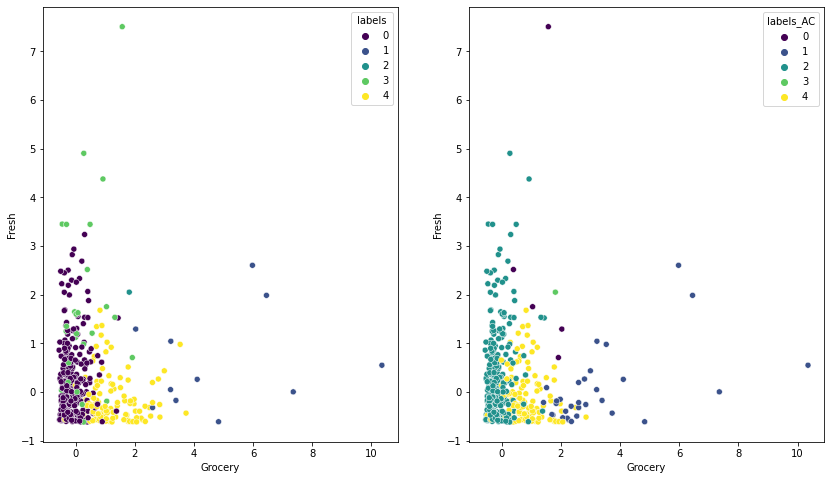

In [317]:
# Your code here:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.scatterplot(x=customers_labels['Grocery'], y=customers_labels['Fresh'], hue=customers_labels['labels'],
               palette='viridis')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

plt.subplot(1, 2, 2) # index 2
sns.scatterplot(x=customers_labels['Grocery'], y=customers_labels['Fresh'], hue=customers_labels['labels_AC'],
               palette='viridis')
plt.xlabel('Grocery')

plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

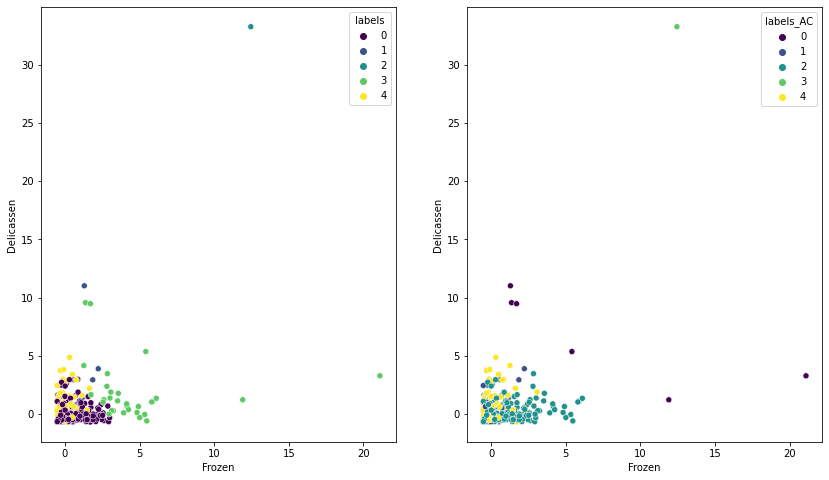

In [318]:
# Your code here:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.scatterplot(x=customers_labels['Frozen'], y=customers_labels['Delicassen'], hue=customers_labels['labels'],
               palette='viridis')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

plt.subplot(1, 2, 2) # index 2
sns.scatterplot(x=customers_labels['Frozen'], y=customers_labels['Delicassen'], hue=customers_labels['labels_AC'],
               palette='viridis')
plt.xlabel('Frozen')

plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [323]:
# Your code here:
customers_labels.groupby('labels').mean().iloc[:, :-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
labels,,,,,,,,,
0,0.248738,-0.132401,-0.123756,0.314462,0.009170,0.014976,0.097222,0.715278,0.100694
1,0.608945,5.521652,4.865565,0.611470,6.054591,2.274691,0.090909,0.727273,1.000000
2,2.052948,7.127668,1.812884,12.449502,-0.157561,33.270184,0.000000,1.000000,0.000000
3,1.563110,0.452864,0.234661,4.585989,0.032985,1.834254,0.133333,0.700000,0.033333
4,-0.144122,1.139974,1.260388,-0.049318,1.616558,0.515233,0.127273,0.727273,0.918182


In [325]:
customers_labels.groupby('labels_AC').mean().iloc[:, :-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
labels_AC,,,,,,,,,
0,2.330955,2.075596,1.107112,7.130512,0.522065,6.658404,0.166667,0.833333,0.166667
1,0.043385,2.895508,3.243677,0.141846,4.207436,0.590412,0.225806,0.548387,1.000000
2,0.358201,-0.151385,-0.150352,0.643684,-0.052661,0.081422,0.099291,0.716312,0.021277
3,2.052948,7.127668,1.812884,12.449502,-0.157561,33.270184,0.000000,1.000000,0.000000
4,-0.058071,0.850550,0.823040,0.006223,1.077832,0.498530,0.091667,0.758333,0.866667


Which algorithm appears to perform better?

In [326]:
# Your observations here
# Vemos que ambos modelos se comportaron muy similarmente para los 5 clusters escogidos. Las medias para cada registro y
# cluster es diferente. 

# No se ve una clara mejoria entre los modelos.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [336]:
# Your code here
from sklearn.cluster import KMeans

for i in range(2, 11):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(customers_scale)

    customers_label = kmean.labels_

    customers_labels = customers_scale.copy()
    customers_labels['labels'] = customers_label
    print(f'El numero de clusters usados es de {i}')
    print(customers_labels['labels'].value_counts())
    print('--------' * 10)

El numero de clusters usados es de 2
0    439
1      1
Name: labels, dtype: int64
--------------------------------------------------------------------------------
El numero de clusters usados es de 3
0    378
2     61
1      1
Name: labels, dtype: int64
--------------------------------------------------------------------------------
El numero de clusters usados es de 4
0    365
3     42
2     32
1      1
Name: labels, dtype: int64
--------------------------------------------------------------------------------
El numero de clusters usados es de 5
0    288
4    110
3     30
1     11
2      1
Name: labels, dtype: int64
--------------------------------------------------------------------------------
El numero de clusters usados es de 6
4    260
0    107
3     59
5     11
1      2
2      1
Name: labels, dtype: int64
--------------------------------------------------------------------------------
El numero de clusters usados es de 7
2    257
1    105
0     61
6     10
3      4
5      2
4   

In [337]:
# Your comment here
# Podemos ver que el mejor numero de clusters para este datasets es de 5 que era el que se habia escogido anteriormente
# con el metodo del codo.

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [345]:
# Your code here
aglo_clust = AgglomerativeClustering(n_clusters=5, linkage='complete')
aglo_clust.fit(customers_scale)

customers_labels['labels_AC'] = aglo_clust.labels_
customers_labels['labels_AC'].value_counts()

1    428
0      5
4      4
2      2
3      1
Name: labels_AC, dtype: int64

In [346]:
# Your comment here
# Podemos ver que si cambiamos el parametro de enlace el modelo realiza peor el trabajo porque no esta clasificando
# correctamente los clustters